# newremagine

> New experiences, replay and imagination, titrated, in training

In [1]:
# hide
%load_ext nb_black
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

<IPython.core.display.Javascript object>

# About newremagine

`newremagine` is a python module, built on the torch library for deep learning. Its goal is to use deep learning as a proxy for biological learning to let us explore some basic trade-offs in learning. Here we are interested in learning the kinds of memories which generalize well. By memory I mean any kind of [model of the world](https://arxiv.org/abs/1803.10122).

When it comes down to it, I see three ways to drive this kind of learning:
1. Gather new data
2. Replay old data
3. Imagine new data

To understand better how these interact, `newremagine` sets the problem up in the following way. We assert there is a fixed number of learning trials, `num_episodes`. This number could be as few as 100 and as many as 50000. Given this number we must choose what `fraction` of time we spend on each of the three options above. 

Setting the `num_episodes` and the `fraction` are the two most important choices one makes in setting up a `newremagine` experiment. 

In the model right now, _changes between the three are probabilistic_. In other words to make an experiment we must set the probability weight of each, `fraction = (p_new, p_replay, p_imagine)`. See the usage section below for some examples. 

Now it is probably true that fractions will work better for different models, kinds of data, and number of episodes. But perhaps, hidden in there, is a simpler rule? This is one of the questions it would be good to have an answer for!

To get started I have set things in the code to use some self-supervised memory models, called an [autoencoders](https://en.wikipedia.org/wiki/Autoencoder). A VAE, in particular. Right now we have only the simplest classic kind of [VAE](https://arxiv.org/abs/1312.6114). I expect in the future we will consider others, for there are many [more](https://github.com/AntixK/PyTorch-VAE). We will also want to look at other kinds of memory. [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) being first among them.

In the examples in these docs I have also focused on just a couple kinds of visual data. The MINST sets, in particular. As our experience grows with these, we will want to consider other data as well. Because the more data (and models) we try the more general our conclusions can be. Assuming there are general principles to discover at all, of course.

For data I am especially interested in [MNIST-C](https://github.com/google-research/mnist-c) and [Celeb-A](https://pytorch.org/docs/stable/torchvision/datasets.html#celeba) and [CIFAR](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar). But please reader try your own ideas, and follow your own instincts!


## Performance
Note that I don't think our goal is to achieve state-of-the-art. We should see how things trade-off. Later we can worry about the [benchmarks](http://ai-benchmark.com/tests.html) 

In trying out different `fraction`s I would make sure to try a small number of episodes (maybe 200) and large number (10000?), and a couple spots in between.

There are several ways to judge performance. 
- The first is visualizing the reconstructions made from test data (`plot_test`), 
- We can also look at the kinds of data the model will generate/imagine (`plot_latent`). 
- A good way to quantitatively measure is the final loss, from the model itself. 
- (In deep models it should often be true that the loss on the training data will track loss on test data. [Overparameterization](https://arxiv.org/abs/1811.03962) is a strange strange thing.) 
- A final way is to use the fact that VAEs learn a latent or compressed model. It is known that a latent like this can form the basis for a good linear classifier. 

In other words we can use our eyes, and from there use error to see how accurate the encoding seems, and linear decoding to estimate how "useful" it is. (I don't know off hand that these last two are related to each other. Past a certain point, anyway.)

## Sidebar: perfect and imperfect replay

__This feature is here for you future Dr Krista Bond!__

Replay in a deep models works by just keeping a copy of the original data. But biological learners don't, by and large, get to keep a perfect copy of everything they have ever seen. This means that when they replay memories they must use their own imperfect reconstructions of what they saw.

The `newreimagine.core.train` function has an option that tries to approximate this real limitation. To try using imperfect replay, set the `perfect` flag to false. An example of this is shown below.

# Usage

# Step 0. Get some data
[There are many different kinds](https://pytorch.org/docs/stable/torchvision/datasets.html) of picture data ready to use in pytorch. As an example we'll use the easy to learn and visualize MINST data. This collection of handwritten digits is a classic example in ML. For a long while this was a "hard" problem to learn. Now, it is very easy. 

All data in torch comes with a [standard interface](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

You always need to load train/test sets seperate-like, as below. (If this is your first time running this notebook, the data will be downloaded for you). 

In [ ]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

In [ ]:
train_dataset = MNIST(
    "data/", download=True, train=True, transform=transforms.ToTensor()
)
test_dataset = MNIST(
    "data/", train=False, transform=transforms.ToTensor()
)

# Step 1. Train the model

In [ ]:
from newremagine.core import train
from newremagine.core import plot_latent
from newremagine.core import plot_test

In [57]:
fraction = [0.1, 0.8, 0.1]  # <--- play with this
model, memory, loss = train(
    fraction,
    train_dataset,
    num_episodes=1000,  # <--- play with this
    batch_size=8,
    num_burn=16,
    lr=0.001,
    perfect=True,
)
loss

1166.21484375

<IPython.core.display.Javascript object>

If the model is doing well, the plot below will look like nice crisp numbers

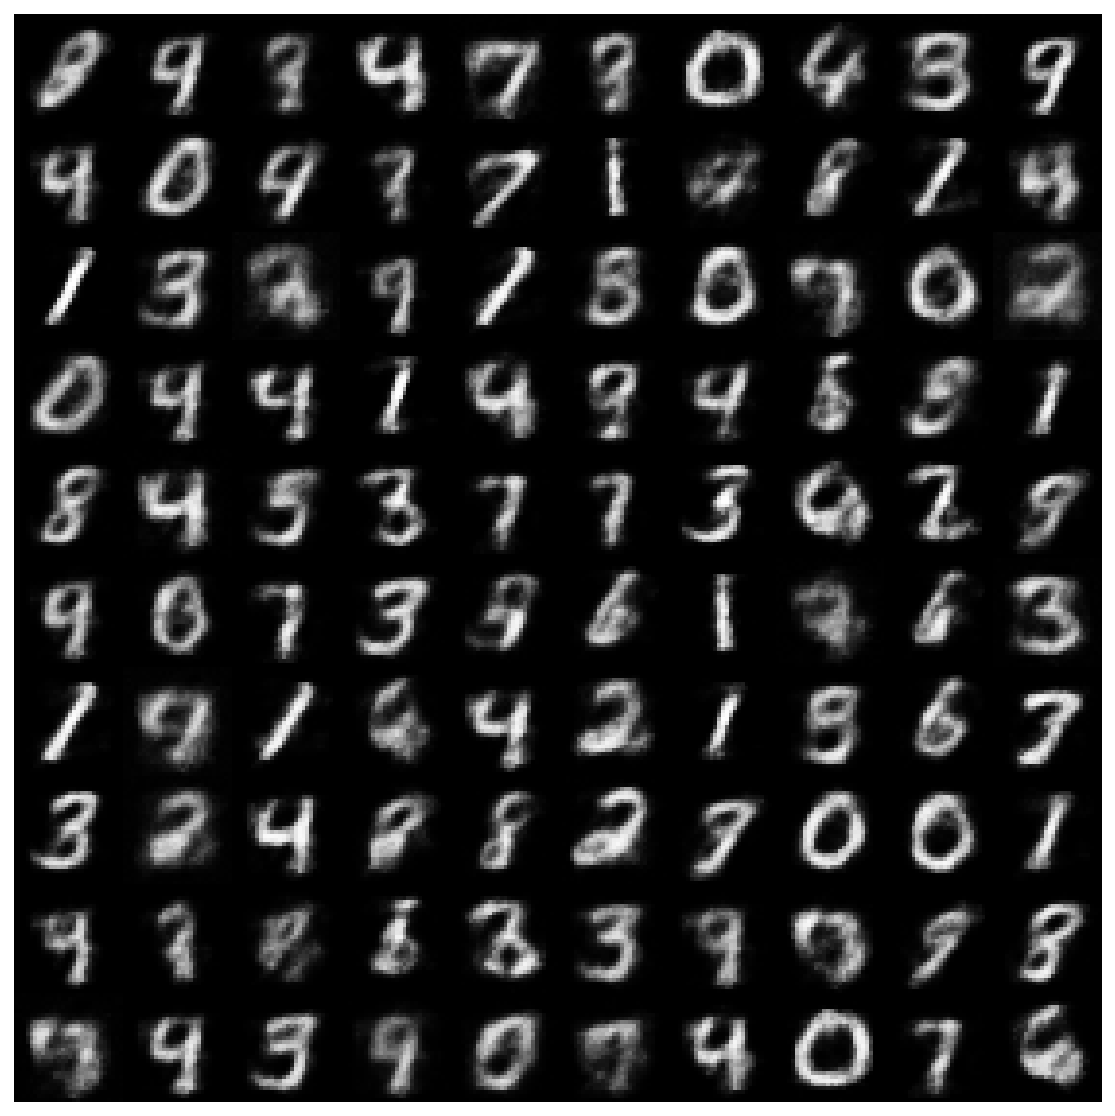

<IPython.core.display.Javascript object>

In [59]:
plot_test(train_dataset, model, 10)

I don't know what makes a good latent space, or at least how to put it into words. I would play around with `num_episoces` and the plot for quire a while to develop some intuition.

There [are ways](https://colah.github.io/posts/2014-10-Visualizing-MNIST/) to do dimensionality reduction and clustering of the latent space. This would be useful feature to add in the future. Ahem, reader.

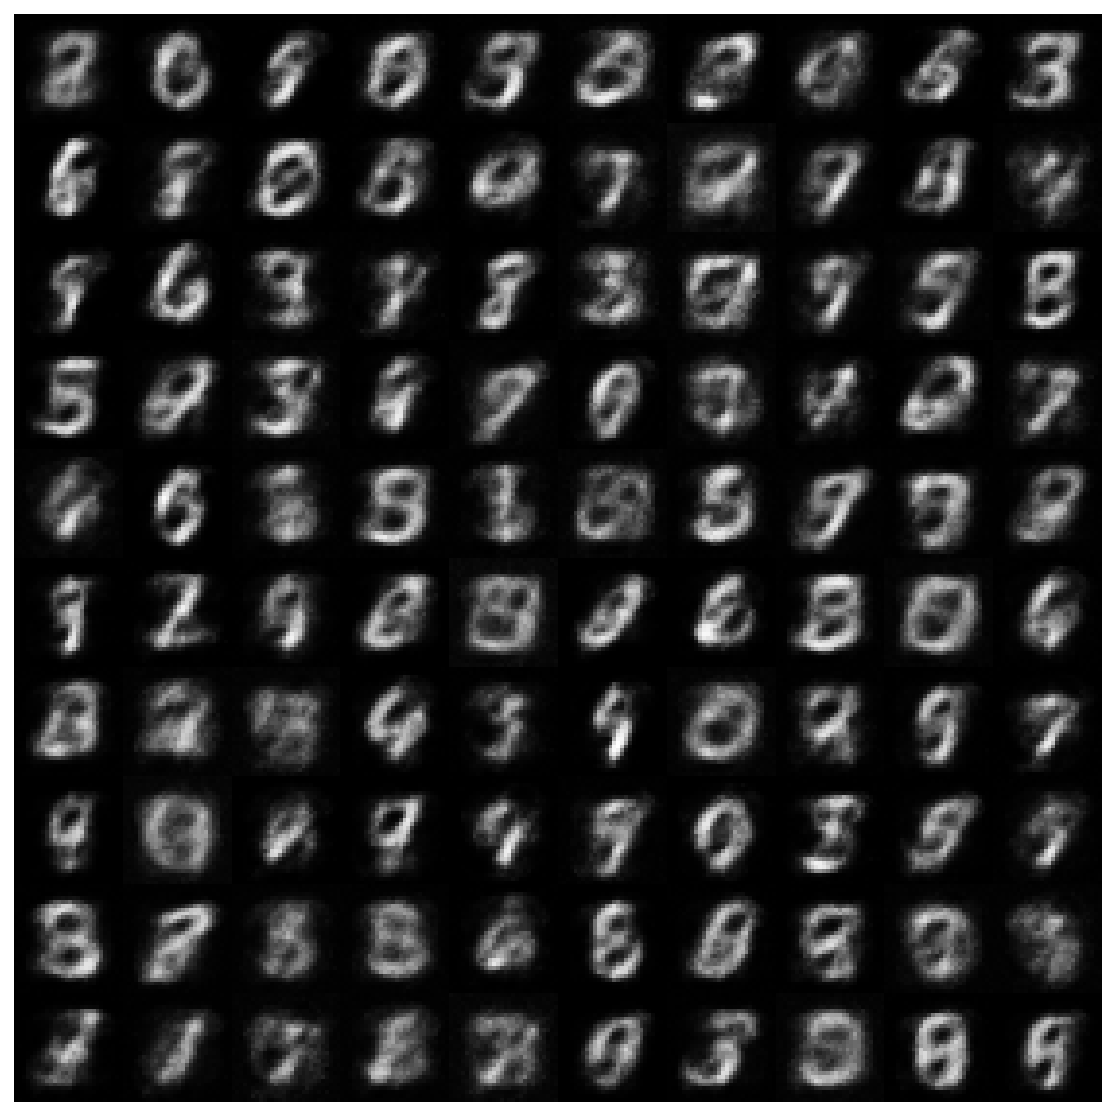

<IPython.core.display.Javascript object>

In [52]:
plot_latent(model, 10)

## Usage sidebar: perfect and imperfect replay

To run the same model as the last example, but with imperfect memory replay, set `perfect=False`. Note how in the above perfect was set to true.

In [55]:
fraction = [0.1, 0.8, 0.1]
model, memory, loss = train(
    fraction,
    train_dataset,
    num_episodes=1000,
    batch_size=8,
    num_burn=16,
    lr=0.001,
    perfect=False,  # <--- !
)
loss

1867.572021484375

<IPython.core.display.Javascript object>

# Step 2. Test the VAE
__Do not use the test data until the end of your experiments__. I mean if you can help it. It you want to cross-validate parameter choise split up the training data. I mean, if you can.

In [ ]:
from newremagine.core import test

In [8]:
# test
test(model, test_dataset)

1608187.662700653

<IPython.core.display.Javascript object>

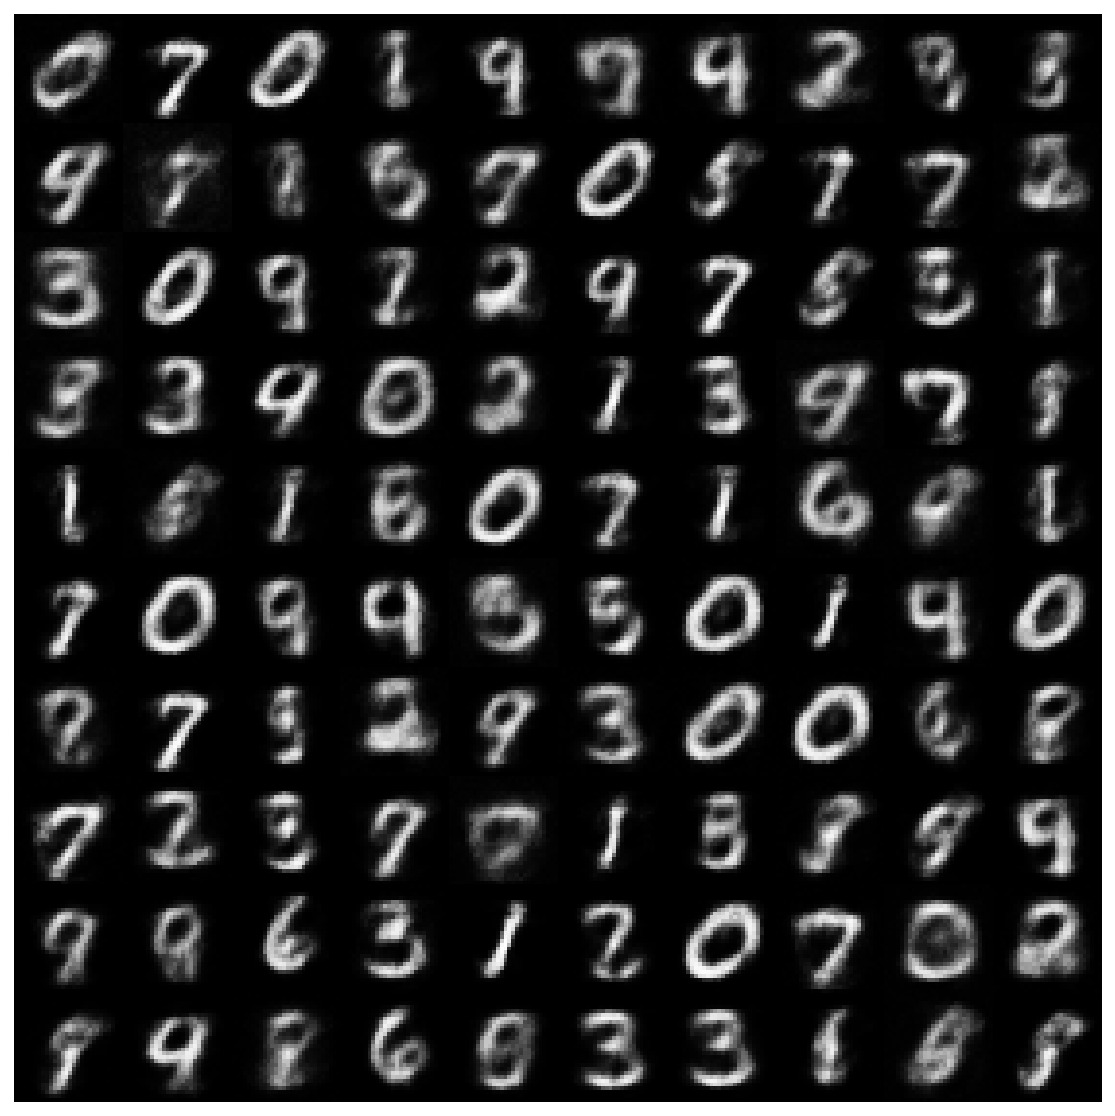

<IPython.core.display.Javascript object>

In [9]:
plot_test(test_dataset, model, 10)